# Breast Cancer Wisconsin (Diagnostic) Dataset

##  Overview
The dataset is derived from **digitized images of fine needle aspirate (FNA)** of breast masses.  
It contains features that describe the **cell nuclei** present in the images.  
The task is a **binary classification** problem:  
- **M (Malignant)** → Cancerous tumor  
- **B (Benign)** → Non-cancerous tumor  

This dataset is widely used to practice machine learning algorithms such as **Logistic Regression**, **SVM**, and **Random Forests**.

---

## Features
There are **30 numeric features** computed for each cell nucleus, based on its shape and texture.  
Some examples include:

- **Radius**: Mean distance from center to perimeter  
- **Texture**: Standard deviation of gray-scale values  
- **Perimeter**  
- **Area**  
- **Smoothness**: Local variation in radius lengths  
- **Compactness**: `(perimeter² / area - 1.0)`  
- **Concavity**: Severity of concave portions of the contour  
- **Concave points**: Number of concave portions of the contour  
- **Symmetry**  
- **Fractal dimension**: Approximation of coastline complexity  

Each feature has a **mean**, **standard error**, and **worst** value (largest mean value among three worst cases).  
This makes the dataset **30 features in total**.

---

## Target Variable
- `diagnosis`  
  - **M** = Malignant (cancerous)  
  - **B** = Benign (non-cancerous)  

For machine learning, the target is often encoded as:  
- `M → 1`  
- `B → 0`

---

## Dataset Size
- **Samples**: 569  
- **Features**: 30 numeric features  
- **Target**: Binary (M/B)

---

## Reference
K. P. Bennett and O. L. Mangasarian (1992).  
*"Robust Linear Programming Discrimination of Two Linearly Inseparable Sets"*.  
Optimization Methods and Software 1, pp. 23–34.  

Dataset available on [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).


### **Importing Libaries**

In [184]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report ,confusion_matrix

### **Reading the dataset**

In [185]:
path=r'd:\ML classification\data.csv'
df=pd.read_csv(path)


### **Checking for Nulls**

In [186]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### **Dropping columns that will not be used in our model** 

In [187]:
df.drop(columns='Unnamed: 32',inplace=True)
df.drop(columns='id',inplace=True)

### **Replacing the Malignant and bengin with 1 and 0**

In [188]:

df.loc[df['diagnosis']=='M','diagnosis']=1
df.loc[df['diagnosis']=='B','diagnosis']=0
df['diagnosis']=df['diagnosis'].apply(int)

### **Setting up X and Y for training the model**

In [189]:
X=df.drop(columns='diagnosis')
Y=df['diagnosis']

### **Spliting the data for training and testing**

In [190]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=24)

### **Training the Model**

In [191]:
logreg=LogisticRegression()

In [192]:
logreg.fit(X_train,Y_train)

c:\Users\PCCV\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### **Predictaing the output for test and train data splits**

In [193]:
Y_pred_test=logreg.predict(X_test)
Y_pred_train=logreg.predict(X_train)

### **Classification report for test and train data**

In [194]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        90
           1       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [195]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       267
           1       0.94      0.92      0.93       159

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426



### **Confussion matrix showing predication vs actual data**

Text(220.72222222222223, 0.5, 'Actual')

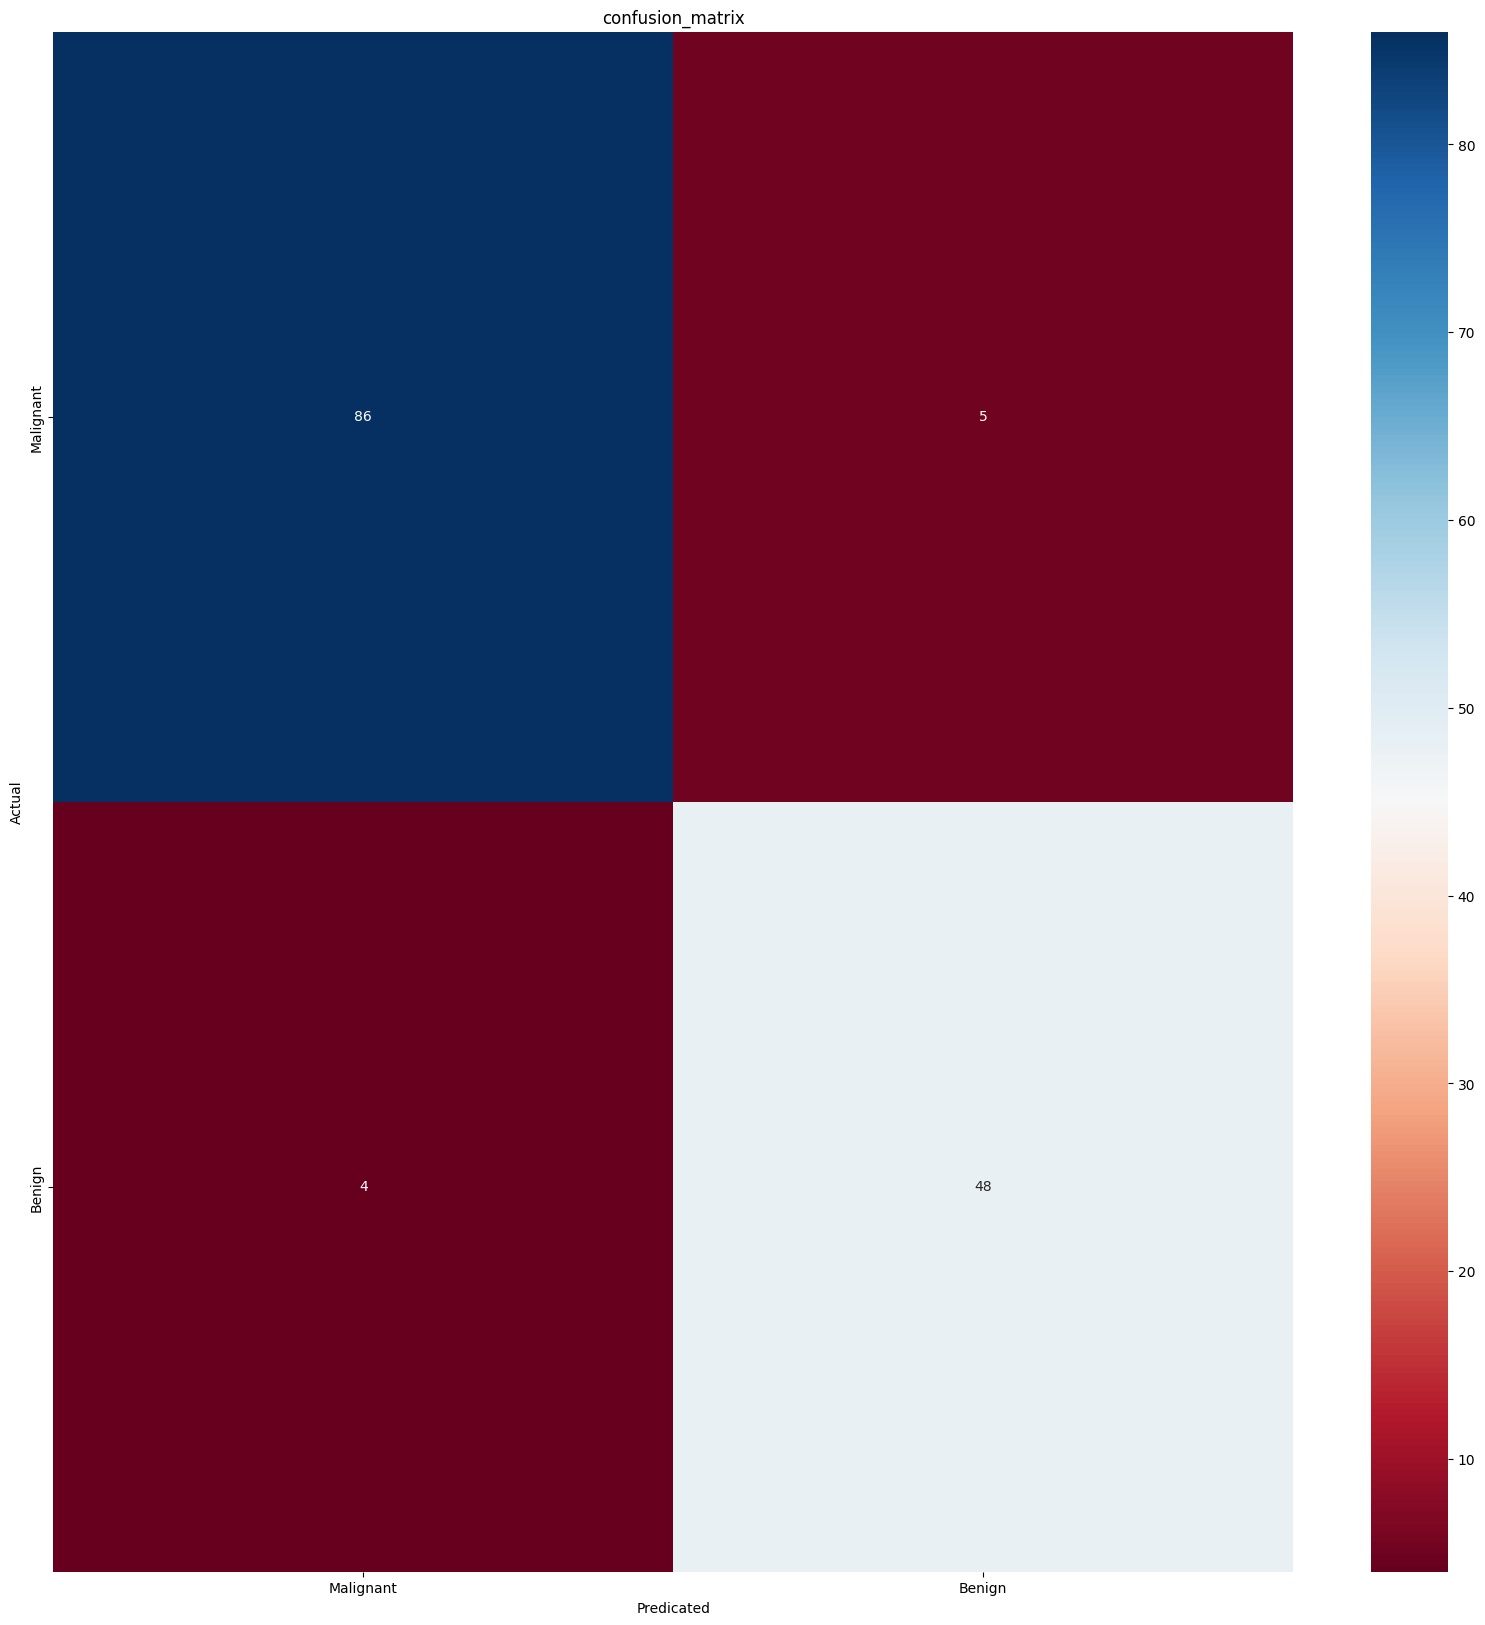

In [196]:
corr=confusion_matrix(Y_pred_test,Y_test)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Malignant','Benign'],yticklabels=['Malignant','Benign'])  
plt.title("confusion_matrix")
plt.xlabel("Predicated")
plt.ylabel("Actual")

### **Using Cross validation to evaluate the model**

In [197]:
scores = cross_val_score(logreg, X, Y, cv=10)  

c:\Users\PCCV\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\PCCV\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

In [198]:
print("Average accuracy:", scores.mean())

Average accuracy: 0.9437969924812029
